<a href="https://colab.research.google.com/github/wlachape/MAT-421/blob/main/Paper_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression Model for Project Data

Intercept: 
 10391.982484273576
Coefficients: 
 [-2.72046454e+00  1.01510209e-04 -5.69998367e-04  4.50407314e-04
  5.86044524e-03]
Predicted Attendance: 
 [-2383.33327257]
                                  OLS Regression Results                                  
Dep. Variable:     Average_NHL_attendance_per_day   R-squared:                       0.610
Model:                                        OLS   Adj. R-squared:                  0.606
Method:                             Least Squares   F-statistic:                     135.6
Date:                            Sat, 16 Apr 2022   Prob (F-statistic):           2.88e-86
Time:                                    18:16:25   Log-Likelihood:                -4316.4
No. Observations:                             439   AIC:                             8645.
Df Residuals:                                 433   BIC:                             8669.
Df Model:                                       5                                         
Covarianc

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.28977e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


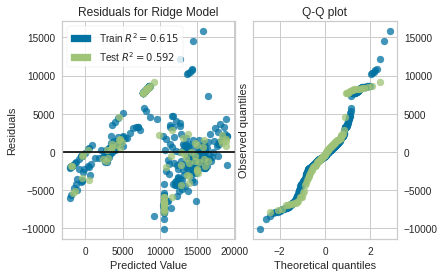

In [2]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot


df = pd.read_excel("MAT421_ProjectDataUse.xlsx","Sheet3")


X = df[['deaths_avg','total_vaccinations','people_vaccinated','people_fully_vaccinated','daily_people_vaccinated']]
y = df['Average_NHL_attendance_per_day']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
new_deaths_avg = 4890
new_total_vaccinations = 7834
new_people_vaccinated = 91462
new_people_fully_vaccinated = 82466
new_daily_people_vaccinated = 92476
print ('Predicted Attendance: \n', regr.predict([[new_deaths_avg,new_total_vaccinations,new_people_vaccinated,new_people_fully_vaccinated,new_daily_people_vaccinated]]))

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Ridge()
visualizer = ResidualsPlot(model, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

In [3]:

!apt-get install -y xvfb 
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    
os.environ['DISPLAY']=':1.0'    
!apt install ghostscript python3-tk
chunked_sentence = '(S (NP this tree) (VP (V is) (AdjP pretty)))'
from nltk.tree import Tree
from IPython.display import display
tree = Tree.fromstring(str(chunked_sentence))

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 784 kB of archives.
After this operation, 2,271 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.10 [784 kB]
Fetched 784 kB in 0s (8,289 kB/s)
Selecting previously unselected package xvfb.
(Reading database ... 155455 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.10_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.10) ...
Setting up xvfb (2:1.19.6-1ubuntu4.10) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-tk is already the newest version (3.6.9-1~18.04).
The following additional packages will be installed:
  fonts-dr

In [ ]:
import pandas as pd
from sklearn import linear_model
import tkinter as tk 
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

df = pd.read_excel("MAT421_ProjectDataUse.xlsx","Sheet3")


X = df[['deaths_avg','total_vaccinations','people_vaccinated','people_fully_vaccinated','daily_people_vaccinated']]
y = df['Average_NHL_attendance_per_day']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# tkinter GUI
root= tk.Tk()

canvas1 = tk.Canvas(root, width = 600, height = 600)
canvas1.pack()

# with sklearn
Intercept_result = ('Intercept: ', regr.intercept_)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(300, 330, window=label_Intercept)


# with sklearn
Coefficients_result  = ('Coefficients: ', regr.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(300, 370, window=label_Coefficients)


label4 = tk.Label(root, text='deaths_avg: ')
canvas1.create_window(130, 100, window=label4)

entry4 = tk.Entry (root) 
canvas1.create_window(300, 100, window=entry4)

label5 = tk.Label(root, text='total_vaccinations')
canvas1.create_window(130, 130, window=label5)

entry5 = tk.Entry (root) 
canvas1.create_window(300, 130, window=entry5)

label6 = tk.Label(root, text='people_vaccinated')
canvas1.create_window(130, 160, window=label6)

entry6 = tk.Entry (root) 
canvas1.create_window(300, 160, window=entry6)

label7 = tk.Label(root, text='people_fully_vaccinated')
canvas1.create_window(130, 190, window=label7)

entry7 = tk.Entry (root) 
canvas1.create_window(300, 190, window=entry7)

label8 = tk.Label(root, text='daily_people_vaccinated')
canvas1.create_window(130, 220, window=label8)

entry8 = tk.Entry (root) 
canvas1.create_window(300, 220, window=entry8)


def values(): 
    
    global new_deaths_avg 
    new_deaths_avg = float(entry4.get()) 

    global new_total_vaccinations 
    new_total_vaccinations = float(entry5.get()) 
    
    global new_people_vaccinated 
    new_people_vaccinated = float(entry6.get()) 
    
    global new_people_fully_vaccinated 
    new_people_fully_vaccinated = float(entry7.get()) 

    global new_daily_people_vaccinated 
    new_daily_people_vaccinated = float(entry8.get()) 
    
    
    Prediction_result  = ('Predicted Attendance: ', regr.predict([[new_deaths_avg,new_total_vaccinations,new_people_vaccinated,new_people_fully_vaccinated,new_daily_people_vaccinated]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    canvas1.create_window(300, 300, window=label_Prediction)
    
button1 = tk.Button (root, text='Predict Attendance ',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(300, 260, window=button1)

root.mainloop()

Intercept: 
 10391.982484273576
Coefficients: 
 [-2.72046454e+00  1.01510209e-04 -5.69998367e-04  4.50407314e-04
  5.86044524e-03]
